## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
#import libraries
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!ls "/content/drive/My Drive/Paridhi_Colab/CNN_Project/Data"


labels.csv.zip		   Unzip_data
sample_submission.csv.zip  vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
test.zip		   weights.best_from_scratch.hdf5
train.zip


In [0]:
project_path  = '/content/drive/My Drive/Paridhi_Colab/CNN_Project/Data'

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/train.zip', 'r') as z:
  z.extractall()

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/test.zip', 'r') as z:
  z.extractall()

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/sample_submission.csv.zip', 'r') as z:
  z.extractall()

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/labels.csv.zip', 'r') as z:
  z.extractall()

###Read labels.csv file using pandas

In [0]:
import pandas as pd
df_Labels = pd.read_csv('labels.csv')

In [12]:
df_Labels.head(2)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo


### Print the count of each category of Dogs given in the dataset

In [13]:
# total 120 dog breeds are available
df_Labels['breed'].value_counts().count()

120

In [14]:
# Count of each category of dogs
c = df_Labels['breed'].value_counts()
# extracting top most dog breeds
c.sort_values(ascending=False)[:10]

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: breed, dtype: int64

### Get one-hot encodings of labels

In [0]:
#batch_size = 128
num_classes = 120
#epochs = 12

In [0]:
#y_train = keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric
#y_test = keras.utils.to_categorical(y_test, num_classes)     # Keras converst these into 1-hot coded vectors as these are lables

In [0]:
#import keras.utils
#label_new = df_Labels['breed']
#label_new = keras.utils.to_categorical(label_new, num_classes) 

In [18]:
from numpy import array
#from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
values = array(df_Labels['breed'])
print(values)

['boston_bull' 'dingo' 'pekinese' ... 'airedale' 'miniature_pinscher'
 'chesapeake_bay_retriever']


In [0]:

# Check the colwidth 
#pd.options.display.max_colwidth
# resize
#pd.options.display.max_colwidth = 120

# Setting it to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [20]:
#integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

print('Shape is:',onehot_encoded.shape)

[19 37 85 ...  3 75 28]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape is: (10222, 120)


In [21]:
# total number of elements in the encoded array
onehot_encoded.size

1226640

In [22]:
# Let's check the number of 1 and 0 in the encoded array . Sum of the counts must be equal to 1226640
import numpy as np
count1 = 0
count0 = 0
for x in np.nditer(onehot_encoded):
  if x == 1:
    count1 += 1 
  if x == 0:
    count0 += 1

print('Count of 1 in the binary encoded array:', count1)
print('Count of 0 in the binary encoded array:', count0)
print('Total number of elements in the encoded array is :', count0+count1)

#Alternate way to check in any particular column
#np.any(onehot_encoded[:, 16] == 1)


Count of 1 in the binary encoded array: 10222
Count of 0 in the binary encoded array: 1216418
Total number of elements in the encoded array is : 1226640


In [0]:
# replacing underscore for the breed names
#df_Labels.breed = df_Labels.breed.str.replace('_', ' ')

In [24]:
df_Labels.breed[:10] 

0    boston_bull       
1    dingo             
2    pekinese          
3    bluetick          
4    golden_retriever  
5    bedlington_terrier
6    bedlington_terrier
7    borzoi            
8    basenji           
9    scottish_deerhound
Name: breed, dtype: object

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128
#num_channel = 1

In [26]:
#Preparing training data

from tqdm import tqdm
import cv2 

x_train_data = []
y_train_data = []

#f for format ,jpg
for f, img in tqdm(df_Labels.values):  
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)  
  train_img_resize = cv2.resize(train_img, (img_rows,img_cols))  
  x_train_data.append(train_img_resize)
  y_train_data.append(img)

100%|██████████| 10222/10222 [00:27<00:00, 367.42it/s]


In [27]:
y_train_data[0]

'boston_bull'

In [0]:
y_train_data = onehot_encoded

In [29]:
import numpy as np
y_train_data = np.array(y_train_data)
y_train_data.shape

(10222, 120)

In [30]:
x_train_data = np.array(x_train_data)
x_train_data.shape

(10222, 128, 128, 3)

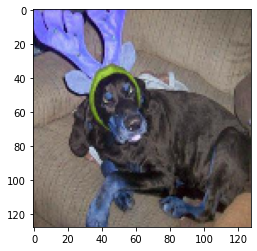

In [31]:
import matplotlib.pyplot as plt
plt.imshow(x_train_data[28])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [32]:
# pixel normalization
from numpy import asarray
# load image
x_train_data = asarray(x_train_data)
# confirm pixel range is 0-255
print('Data Type: %s' % x_train_data.dtype)
print('Min: %.3f, Max: %.3f' % (x_train_data.min(), x_train_data.max()))
# convert from integers to floats
x_train_data = x_train_data.astype('float32')
# normalize to the range 0-1
x_train_data /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (x_train_data.min(), x_train_data.max()))
print('train data shape:',x_train_data.shape)

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
train data shape: (10222, 128, 128, 3)


Split the training and validation data from x_train_data and y_train_data obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train_data,y_train_data, test_size=0.30, random_state=42)

In [34]:
print (len(X_train))
print (len(X_val))

7155
3067


In [35]:
print (X_train.shape)
print (X_val.shape)

(7155, 128, 128, 3)
(3067, 128, 128, 3)


Loading the test data

Read the id column from the samples_submission.csv and store it in test_img

In [0]:
df_SampleSubmission = pd.read_csv('sample_submission.csv')

In [37]:
df_SampleSubmission.head(5)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,english_setter,english_springer,entlebucher,eskimo_dog,flat-coated_retriever,french_bulldog,german_shepherd,german_short-haired_pointer,giant_schnauzer,golden_retriever,gordon_setter,great_dane,great_pyrenees,greater_swiss_mountain_dog,groenendael,ibizan_hound,irish_setter,irish_terrier,irish_water_spaniel,irish_wolfhound,italian_greyhound,japanese_spaniel,keeshond,kelpie,kerry_blue_terrier,komondor,kuvasz,labrador_retriever,lakeland_terrier,leonberg,lhasa,malamute,malinois,maltese_dog,mexican_hairless,miniature_pinscher,miniature_poodle,miniature_schnauzer,newfoundland,norfolk_terrier,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.

In [0]:
test_img = df_SampleSubmission.id

Run the below code to load the test image files in x_test_feature

In [39]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:28<00:00, 367.64it/s]


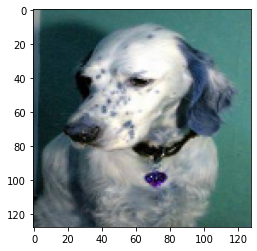

In [40]:
import matplotlib.pyplot as plt
plt.imshow(x_test_feature[28])

In [41]:
x_test_feature = array(x_test_feature)
print(len(x_test_feature))
print(x_test_feature[0].shape)

10357
(128, 128, 3)


In [42]:
x_test_feature.shape

(10357, 128, 128, 3)

Normalize the test data and convert it into 4 dimensions

In [43]:
# pixel normalization
from numpy import asarray
x_test_feature = asarray(x_test_feature)
# confirm pixel range is 0-255
print('Data Type: %s' % x_test_feature.dtype)
print('Min: %.3f, Max: %.3f' % (x_test_feature.min(), x_test_feature.max()))
# convert from integers to floats
x_test_feature = x_test_feature.astype('float32')
# normalize to the range 0-1
x_test_feature /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (x_test_feature.min(), x_test_feature.max()))
print('test data shape:',x_test_feature.shape)

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
test data shape: (10357, 128, 128, 3)


In [44]:
#x_test_feature = np.reshape(x_test_feature, (10357,128,128,1))
print('test data shape:',x_test_feature.shape)

test data shape: (10357, 128, 128, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [45]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
#!pip install tensorflow==1.15.2

TensorFlow 1.x selected.
1.15.2


In [46]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(BatchNormalization(input_shape=(128, 128, 3)))
model.add(Conv2D(filters=128, kernel_size=5, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu'))
#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25))
model.add(Dense(120, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 128)     9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 256)     

# Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
epochs = 10
batch_size = 128

In [0]:
#compile the model
#stochastic gradient descent -Adam -optimizer
#loss func categorical cross entropy
#metrics = accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(7155, 128, 128, 3)
(7155, 120)
(3067, 128, 128, 3)
(3067, 120)


In [0]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath= project_path+'/weights.best_from_scratch.hdf5', 
                               verbose=1, save_best_only=True)



In [51]:
model.fit(X_train, y_train, validation_split = 0.20, epochs= epochs, batch_size= batch_size,callbacks = [checkpointer], verbose=1)


Train on 5724 samples, validate on 1431 samples
Epoch 1/10
5724/5724 [==============================] - 25s 4ms/step - loss: 4.7931 - accuracy: 0.0159 - val_loss: 4.8093 - val_accuracy: 0.0112

Epoch 00001: val_loss improved from inf to 4.80926, saving model to /content/drive/My Drive/Paridhi_Colab/CNN_Project/Data/weights.best_from_scratch.hdf5
Epoch 2/10
5724/5724 [==============================] - 13s 2ms/step - loss: 4.6564 - accuracy: 0.0271 - val_loss: 4.8129 - val_accuracy: 0.0133

Epoch 00002: val_loss did not improve from 4.80926
Epoch 3/10
5724/5724 [==============================] - 13s 2ms/step - loss: 4.5900 - accuracy: 0.0327 - val_loss: 4.8438 - val_accuracy: 0.0189

Epoch 00003: val_loss did not improve from 4.80926
Epoch 4/10
5724/5724 [==============================] - 13s 2ms/step - loss: 4.5349 - accuracy: 0.0395 - val_loss: 4.8299 - val_accuracy: 0.0175

Epoch 00004: val_loss did not improve from 4.80926
Epoch 5/10
5724/5724 [==============================] - 13s 

In [0]:
#scores = model.evaluate(X_val, y_val, verbose=1)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))         

#The model accuracy is very poor !!!!

Use Data Augmentation in the above model to see if the accuracy improves

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen  = ImageDataGenerator(width_shift_range= 0.1,height_shift_range=0.1,horizontal_flip=True)

val_datagen  = ImageDataGenerator(width_shift_range= 0.1,height_shift_range=0.1,horizontal_flip=True)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(X_train,y_train,batch_size = 128)

In [0]:
val_generator = val_datagen.flow(X_val,y_val, batch_size=128)


### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs


In [56]:
%tensorflow_version 1.x
#import tensorflow as tf
print(tf.__version__)
#!pip install tensorflow==1.15.2

1.15.2


In [0]:
model.load_weights('/content/drive/My Drive/Paridhi_Colab/CNN_Project/Data/weights.best_from_scratch.hdf5')

In [59]:
model.fit_generator(
        train_generator,
        #steps_per_epoch= X_train.shape[0] - taking these steps was giving very good accuracy but RAM gets full.
        steps_per_epoch= 500,
        epochs=10,
        validation_data = val_generator,
        callbacks=[checkpointer], verbose=1 )

Epoch 1/10
500/500 [==============================] - 264s 528ms/step - loss: 2.0126 - accuracy: 0.4590 - val_loss: 4.4174 - val_accuracy: 0.1666

Epoch 00001: val_loss improved from 4.52351 to 4.41738, saving model to /content/drive/My Drive/Paridhi_Colab/CNN_Project/Data/weights.best_from_scratch.hdf5
Epoch 2/10
500/500 [==============================] - 264s 528ms/step - loss: 1.8132 - accuracy: 0.5044 - val_loss: 3.7843 - val_accuracy: 0.1673

Epoch 00002: val_loss improved from 4.41738 to 3.78426, saving model to /content/drive/My Drive/Paridhi_Colab/CNN_Project/Data/weights.best_from_scratch.hdf5
Epoch 3/10
500/500 [==============================] - 264s 528ms/step - loss: 1.6251 - accuracy: 0.5480 - val_loss: 4.3099 - val_accuracy: 0.1673

Epoch 00003: val_loss did not improve from 3.78426
Epoch 4/10
500/500 [==============================] - 262s 524ms/step - loss: 1.4610 - accuracy: 0.5870 - val_loss: 4.3627 - val_accuracy: 0.1692

Epoch 00004: val_loss did not improve from 3.

KeyboardInterrupt: ignored

Got accuracy of 33% before.

In [0]:
#scores = model.evaluate(X_val, y_val, verbose=0)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

More training

In [0]:
model.load_weights('/content/drive/My Drive/Paridhi_Colab/CNN_Project/Data/weights.best_from_scratch.hdf5')

In [0]:
hist = model.fit_generator(train_generator,
                    validation_data= val_generator, 
                    steps_per_epoch= 64 // batch_size,
                    epochs= 5, callbacks=[checkpointer], verbose=1)

In [0]:
#scores = model.evaluate(X_val, y_val, verbose=0)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

Graph representation of validation loss vs number of epochs

In [0]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.plot(hist.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.show()

Graph representation of test accuracy

In [0]:

plt.plot(hist.history['acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [0]:
plt.plot(hist.history['acc'],label="Accuracy")
plt.plot(hist.history['val_acc'], label="Validation accuracy")
plt.legend()
plt.xlabel('epochs')
plt.show()

In [0]:
plt.plot(hist.history['loss'],label="traing loss")
plt.plot(hist.history['val_loss'], label="Validation loss")
plt.legend()
plt.xlabel('epochs')
plt.show()

# Model accuracy is still poor!!!

Lets use Transfer Learning
Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                   include_top=False,input_shape = (128, 128, 3))

#input_shape = (128, 128, 3)

Print the summary of the base_model

In [63]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
x = base_model.output
x = Flatten()(x)
x = Dropout(0.4)(x)
# let's add two fully-connected layer
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
# and a softmax layer -- let's say we have 200 classes
predictions = Dense(120, activation='softmax')(x)

Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
# Freeze the layers which you don't want to train. 
for layer in base_model.layers[:]:
  layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

In [0]:
# this is the model we will train
from keras.models import Model
model_vgg = Model(input=base_model.input, output=predictions)

In [0]:
# compile the model (should be done *after* setting layers to non-trainable)

from keras.optimizers import SGD, RMSprop, Adam
model_vgg.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:

model_vgg.fit_generator(train_generator, samples_per_epoch= len(train_generator), nb_epoch=10, 
                        validation_data= val_generator,nb_val_samples= len(val_generator),verbose = 1)

In [0]:
model_vgg.optimizer.learning_rate = 1e6
model_vgg.fit_generator(train_generator, samples_per_epoch= train_generator.nb_samples, nb_epoch=10, 
                        validation_data=val_generator, nb_val_samples = val_generator.nb_samples)

In [79]:
scores = model.evaluate(X_val, y_val, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[0]*100)) 

accuracy: 53.00%


In [0]:
model_vgg.save_weights('vgg_model_weights.h5')

Try to get training and validation accuracy to be more than 90%

Using more training data increasing the accuracy but due to GPU load I was unable to train model. By taking steps = X_train.shape[0] was giving the best result.

Also , different augmentation and optimizer function would change the accuracy.